<a href="https://colab.research.google.com/github/mobinym/Exercises/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***DecisionTree Regressor***

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score , mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values
X, y


(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.45,random_state=0)


In [ ]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X,y)

In [40]:
y_pred = dtr_model.predict(X_test)

mse  = mean_squared_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
r2

0.0

In [44]:
y_pred = dtr_model.predict([[3.7]])

array([80000.])

<ipython-input-58-a9d08658c976>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid= np.arange(min(X),max(X),0.01)


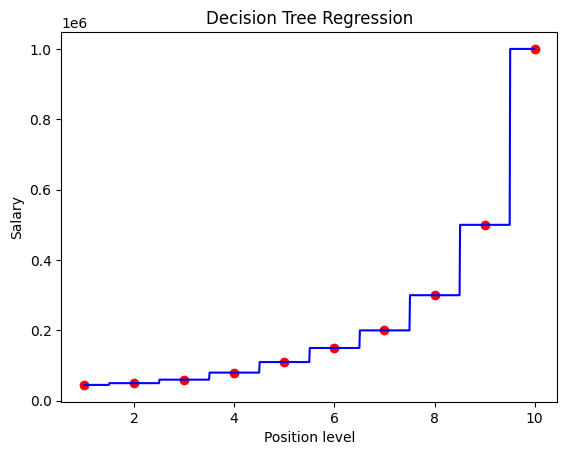

In [58]:
X_grid= np.arange(min(X),max(X),0.01)
X_grid2= X_grid.reshape((len(X_grid)),1)
y_grid2_pred = dtr_model.predict(X_grid2)

plt.scatter(X,y,color='red')
plt.plot(X_grid2,y_grid2_pred, color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


# ***DecisionTree Classifier***

In [18]:
from sklearn.datasets import load_iris , make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data = load_iris()
X = data.data
y = data.target

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred = dtc_model.predict(X_test)

In [13]:
confusion_matrix = confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

**Example 2**

In [35]:
X,y = make_classification(n_samples=100,n_features=5,random_state=42)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
dtc_model_entropy = DecisionTreeClassifier(criterion='entropy')
dtc_model_entropy.fit(X_train,y_train)

y_pred = dtc_model_entropy.predict(X_test)

accuracy_score  = accuracy_score(y_test,y_pred)

0.9

In [ ]:
dtc_model = DecisionTreeClassifier(criterion='gini')
dtc_model.fit(X_train,y_train)

## **Pruning**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
y_pred = clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [8]:
accuracy_score = accuracy_score(y_test,y_pred)
accuracy_score

1.0

In [12]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas , impurities = path.ccp_alphas , path.impurities

array([0.        , 0.01619048, 0.0384127 , 0.04952381, 0.06574003,
       0.08985963, 0.333125  , 0.66652778])

In [21]:
clfs = []

for ccp_alpha in ccp_alphas:
  clf_temp = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
  clf_temp.fit(X_train,y_train)
  clfs.append(clf_temp)

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008095238095238095, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01111111111111111, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.011111111111111113, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01621621621621623, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.024119601328903645, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.24326537293107053, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.3334027777777779, random_state=42)]

In [16]:
clfs = clfs[:-1]

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008095238095238095, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01111111111111111, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.011111111111111113, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01621621621621623, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.024119601328903645, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.24326537293107053, random_state=42)]

In [22]:
max_accuracy = -1
best_clf = None


for clf in clfs :
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f'accuracy : {accuracy}')
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    best_clf = clf

print(f'accuracy after pruning : {max_accuracy}')

accuracy : 1.0
accuracy : 1.0
accuracy : 1.0
accuracy : 1.0
accuracy : 1.0
accuracy : 0.9666666666666667
accuracy : 0.6333333333333333
accuracy : 0.3
accuracy after pruning : 1.0
